<a href="https://colab.research.google.com/github/erandime/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Importing Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV

## 2. Data Loading and Initial Exploration

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv")
pd.set_option("display.max_columns", None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## 3. Data Preprocessing

In [10]:
# Drop customerID column as it is an identifier and not used for modeling
df = df.drop(columns=["customerID"])
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [16]:
#Convert datatype of TotalCharges from object to float
#df["TotalCharges"] = df["TotalCharges"].astype(float)

* Above gives an error as some rows contain blank strings instead of numeric values

In [12]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
len(df[df["TotalCharges"]==" "])

11

In [14]:
# Replace blank strings in TotalCharges with '0.0' as blank strings correspond to customers with 0 Tenure.
#That is for new customers current Total Charge is 0.
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [15]:
# Convert to float after cleaning
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [18]:
# Convert SeniorCitizen from 0/1 to 'No'/'Yes' for consistency with other binary columns
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [19]:
# Define numeric columns to skip when exploring categorical values
numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

# Print unique values of each categorical column
for col in df.columns:
  if col not in numerical_cols:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen ['No' 'Yes']
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No in

In [20]:
# Clean categorical values: merge 'No internet service' and 'No phone service' into 'No'
cols_to_clean = [
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

for col in cols_to_clean:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})


In [21]:
for col in df.columns:
  if col not in numerical_cols:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen ['No' 'Yes']
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes']
--------------------------------------------------
OnlineBackup ['Yes' 'No']
--------------------------------------------------
DeviceProtection ['No' 'Yes']
--------------------------------------------------
TechSupport ['No' 'Yes']
--------------------------------------------------
StreamingTV ['No' 'Yes']
--------------------------------------------------
StreamingMovies ['No' 'Yes']
--------------------------------

In [22]:
# Check the class distribution of the target variable 'Churn'
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


* The target variable Churn is imbalanced.
* Predictive models may favor the majority class (non-churned), resulting in high accuracy but poor recall for churned customers.
* Evaluation metrics like F1-score, precision, and recall should be prioritized over plain accuracy.
* The imbalance should be handled using model-specific weighting techniques.



## 4. Exploratory Data Analysis (EDA)

In [23]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### 4.1 Analysis of Numerical Variables

In [24]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Summary statistics for numerical features
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [25]:
# Compare mean of numerical features by Churn status
df.groupby('Churn').mean(numerical_cols)

,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.569965,61.265124,2549.911442
Yes,17.979133,74.441332,1531.796094


* Churned customers have lower average tenure, indicating they are generally newer customers.
* Churned customers have slightly higher monthly charges than non-churned customers.
* Churned customers have lower total charges, because they've been with the company for a shorter time.
* Overall, customers who churn are typically new and pay more per month, but haven’t stayed long enough to accumulate high total charges.

In [34]:
#Histogram Plot Function
def plot_histogram(df, column_name):
    plt.figure(figsize=(5, 3))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")
    plt.axvline(df[column_name].mean(), color="red", linestyle="--", label="Mean")
    plt.axvline(df[column_name].median(), color="green", linestyle="-", label="Median")
    plt.legend()
    plt.show()

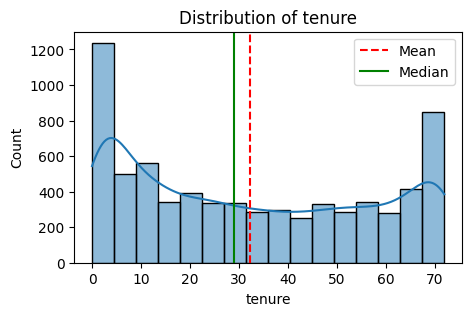

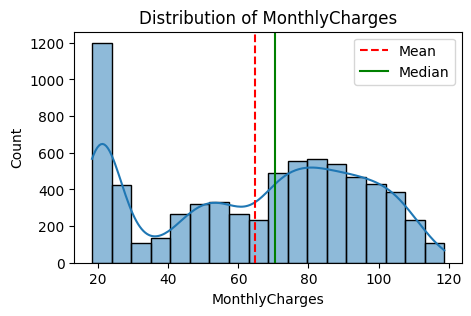

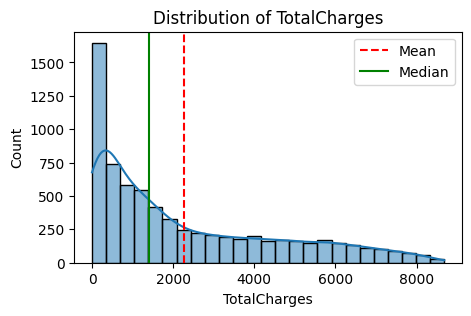

In [35]:
plot_histogram(df, "tenure")
plot_histogram(df, "MonthlyCharges")
plot_histogram(df, "TotalCharges")



* Tenure shows a bimodal distribution, with peaks among short- and long-term customers, suggesting that customers tend to either leave early or stay long-term.
* Monthly charges have a multimodal distribution, indicating that pricing plans or add-on services likely group customers into distinct pricing tiers.
* Total charges are right-skewed with a long tail, reflecting a few high-value long-term customers, while most have lower charges due to shorter tenure.



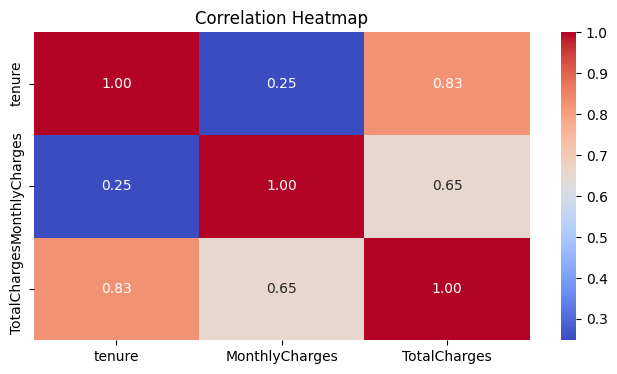

In [39]:
#Correlation Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

* Tenure & TotalCharges - 0.83 - Strong positive correlation. Customers naturally accumulate more charges the longer they stay.
* MonthlyCharges & TotalCharges - 0.65	- Moderate correlation. Higher monthly charges generally lead to higher totals, but tenure is also a key factor.
* Tenure & MonthlyCharges	- 0.25 - Weak positive correlation. Monthly cost doesn’t rise much with tenure, suggesting it's driven more by service choices than customer duration.
* Insight: Tenure is the strongest driver of total charges. Monthly charges are more influenced by selected services than by how long the customer stays.




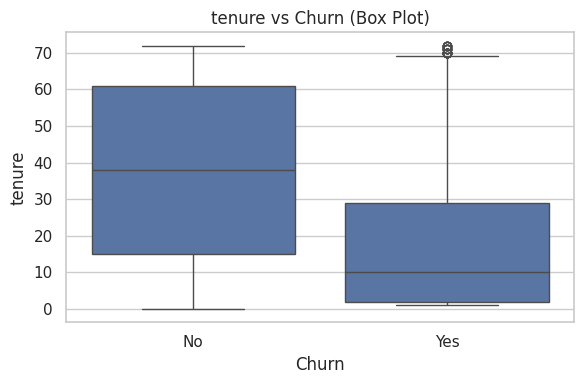

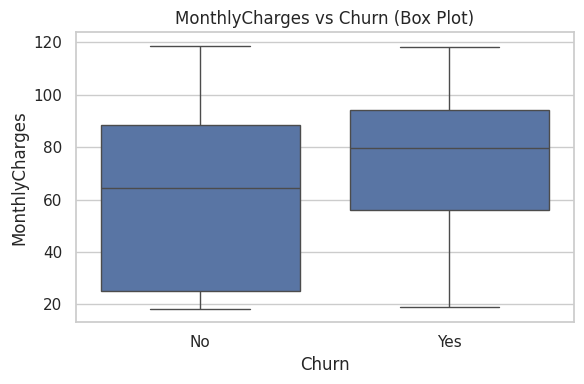

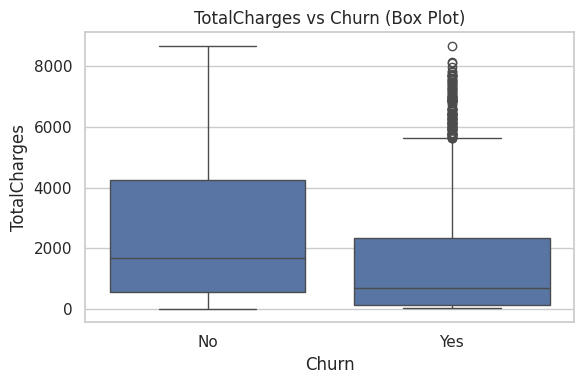

In [40]:
#Boxplots by Churn (Numerical vs Target)
sns.set(style="whitegrid")
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} vs Churn (Box Plot)')
    plt.tight_layout()
    plt.show()



*   Tenure by Churn -
Churned customers have significantly lower tenure, with more outliers among long-term stayers.
Insight: Long-term customers are less likely to churn. Tenure is a strong predictor of retention.
*   Monthly Charges by Churn -
Churned customers tend to have higher monthly charges on average.
Insight: High monthly costs may contribute to churn, especially for newer customers who haven’t yet seen long-term value.
* Total Charges by Churn -
Churned customers have much lower total charges.
Insight: Since total charges reflect how long a customer has been with the company, lower totals among churned customers further support that they tend to leave early in their lifecycle.



### 4.2. Analysis of Categorical features

In [51]:
#Stacked Bar Charts — Churn vs Categorical Variables
# Define groups of related categorical variables
groups = {
    "Customer Demographics": ['gender', 'SeniorCitizen', 'Partner', 'Dependents'],
    "Service Subscriptions": ['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies'],
    "Security & Support": ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'],
    "Contract & Billing": ['Contract', 'PaperlessBilling', 'PaymentMethod']
}

# Reuse the plotting function
def plot_group_churn_stacked(group_name, cols, df):
    rows = (len(cols) + 1) // 2
    fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        ax = axes[i]
        grouped = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
        grouped = grouped.div(grouped.sum(axis=1), axis=0)

        grouped.plot(kind='bar', stacked=True, ax=ax, colormap='Set2', legend=False)
        ax.set_title(f'{col}')
        ax.set_ylabel('Proportion')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

        for bar_idx, category in enumerate(grouped.index):
            cumulative = 0
            for churn_class in grouped.columns:
                height = grouped.loc[category, churn_class]
                if height > 0:
                    ax.text(bar_idx, cumulative + height / 2, f'{height:.0%}',
                            ha='center', va='center', fontsize=8)
                    cumulative += height

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f'{group_name} - Churn Breakdown', fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


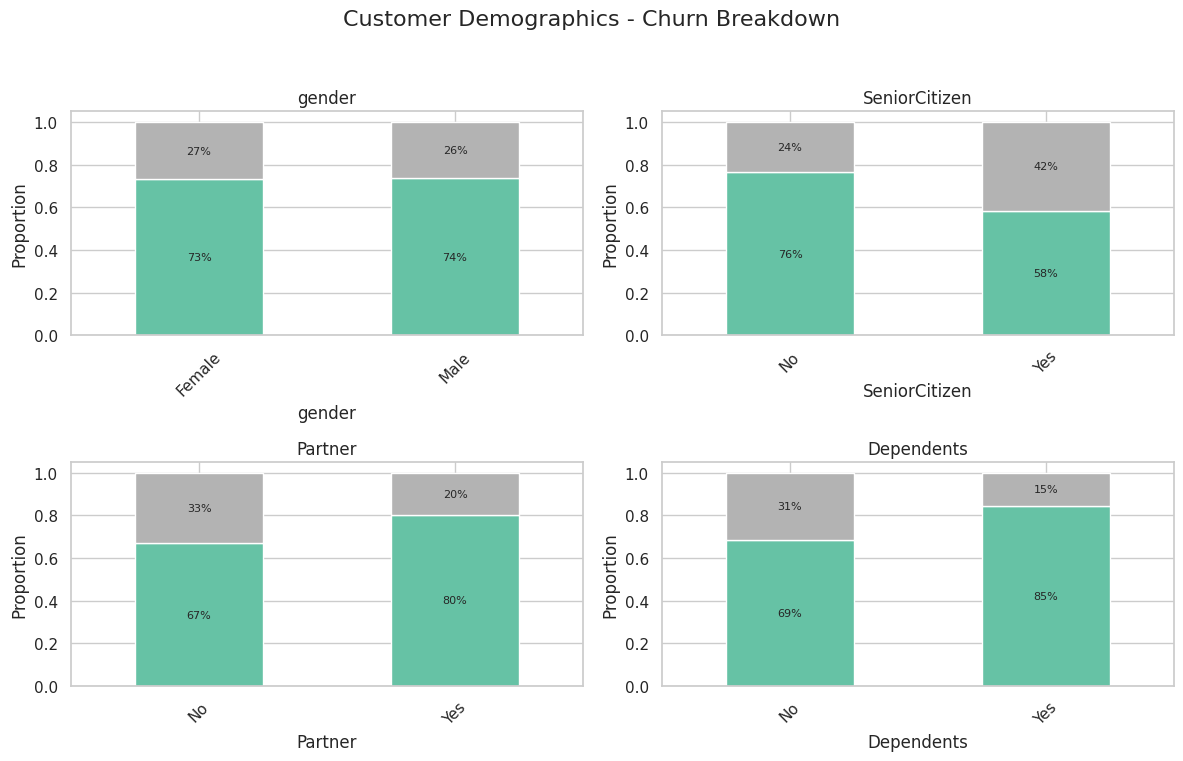

In [52]:
plot_group_churn_stacked("Customer Demographics", groups["Customer Demographics"], df)

* Churn is higher among customers who are:
Senior Citizens /
Without partners /
Without dependents.
* Minimal difference in churn rate by gender.
* Summary: Non-family, senior users are at higher churn risk.

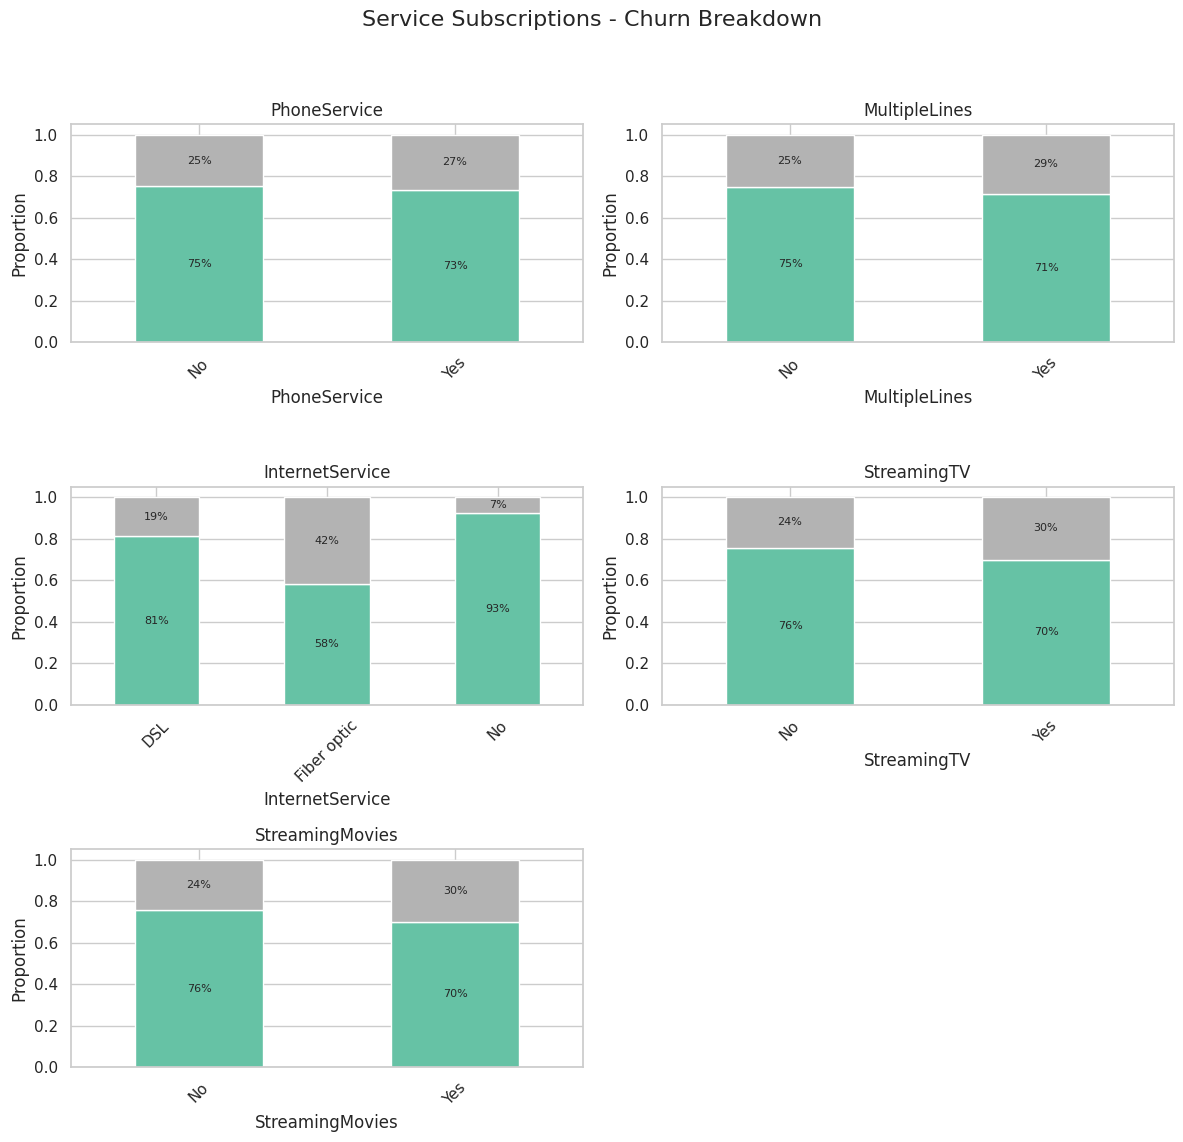

In [48]:
plot_group_churn_stacked("Service Subscriptions", groups["Service Subscriptions"], df)

* Customers with more complex or premium subscriptions (fiber internet, multiple lines, streaming) tend to have higher churn, potentially due to higher costs or unmet expectations.

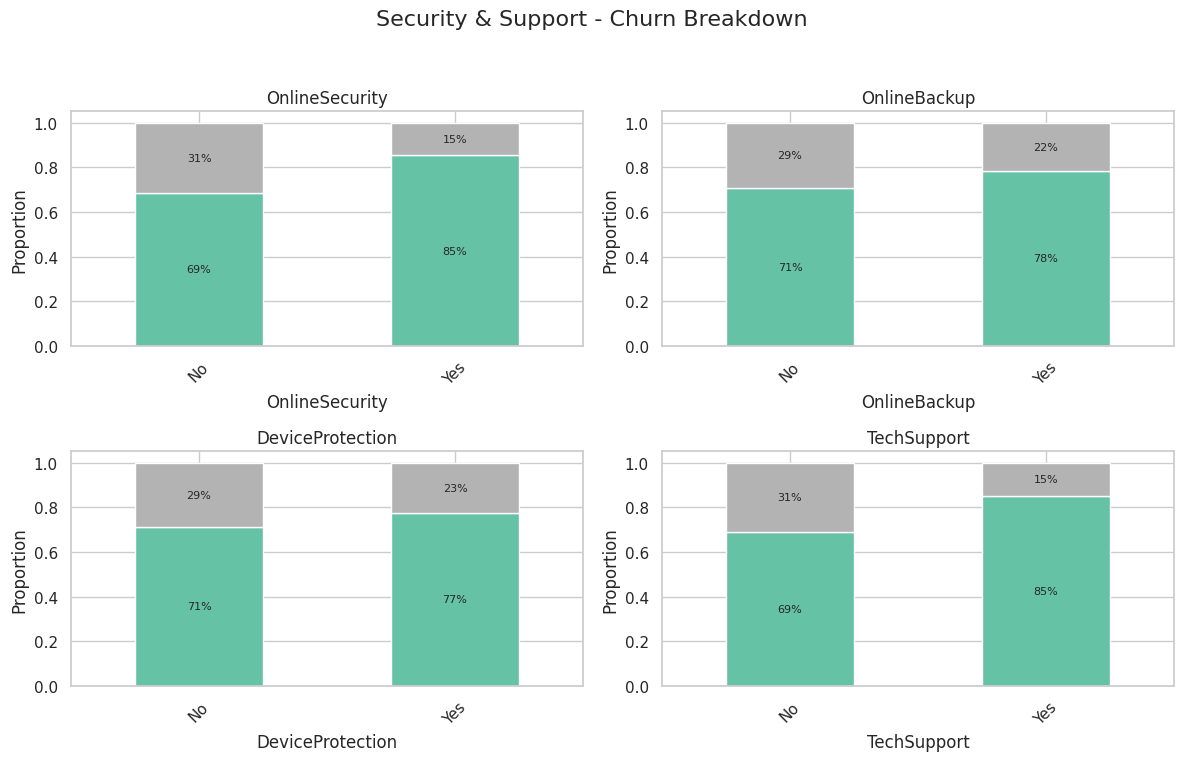

In [49]:
plot_group_churn_stacked("Security & Support", groups["Security & Support"], df)

* Customers without security and support services tend to churn more. These services may contribute to customer retention.

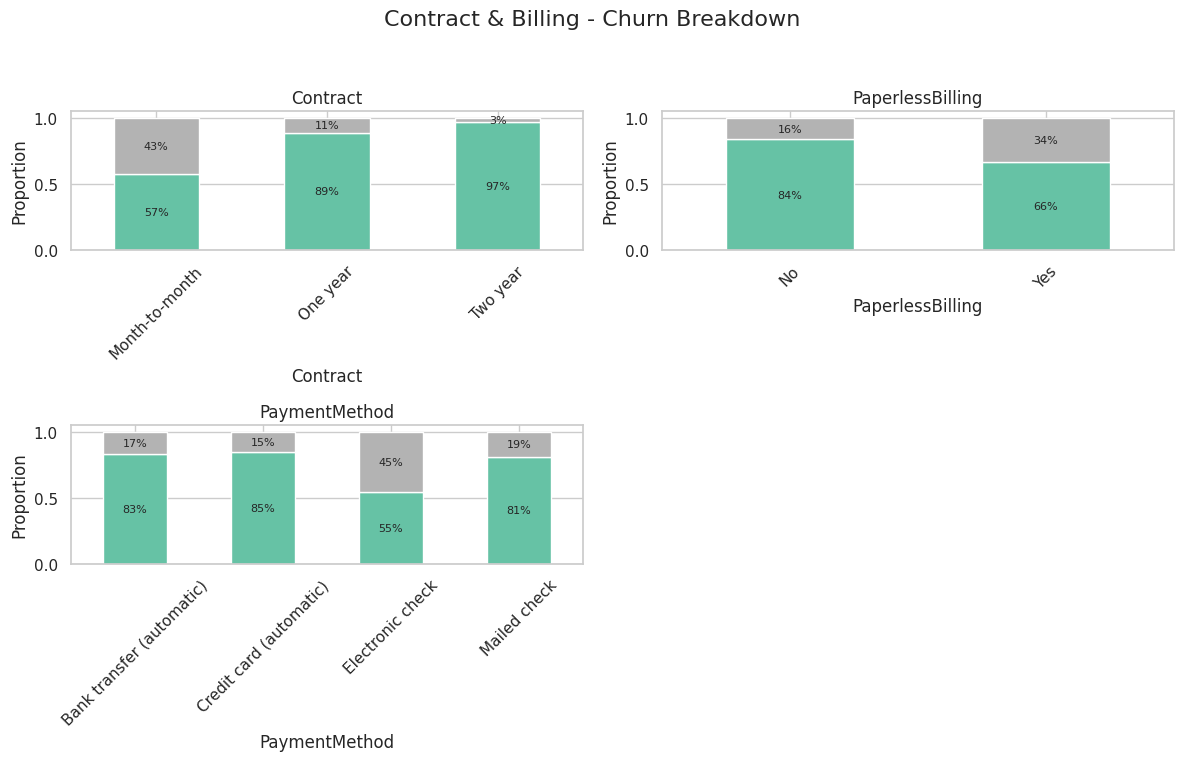

In [50]:
plot_group_churn_stacked("Contract & Billing", groups["Contract & Billing"], df)

* Month-to-month customers churn far more than those on longer-term contracts.
* Electronic check users have a much higher churn rate compared to other payment methods.
* Paperless billing users also show higher churn — possibly linked to digital-first, low-commitment behavior.
* Insight: Short-term commitment and manual/electronic payment methods are strong churn indicators. Longer contracts and automated payments (like credit card or bank transfer) are linked to better retention.

In [54]:
#Pie Charts for Categorical variables for Churned customers
object_cols = df.select_dtypes(include="object").columns.to_list()
object_cols.remove("Churn")

# Filter only churned customers
churned_df = df[df['Churn'] == 'Yes']

def plot_pie_for_group(group_name, cols, churned_df):
    n = len(cols)
    rows = (n + 1) // 2
    fig, axes = plt.subplots(rows, 2, figsize=(10, 4 * rows))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        ax = axes[i]
        churned_df[col].value_counts().plot.pie(
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            ax=ax
        )
        ax.set_title(f'{col}')
        ax.set_ylabel('')

    # Remove any unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f'{group_name} - Pie Charts (Churned Only)', fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

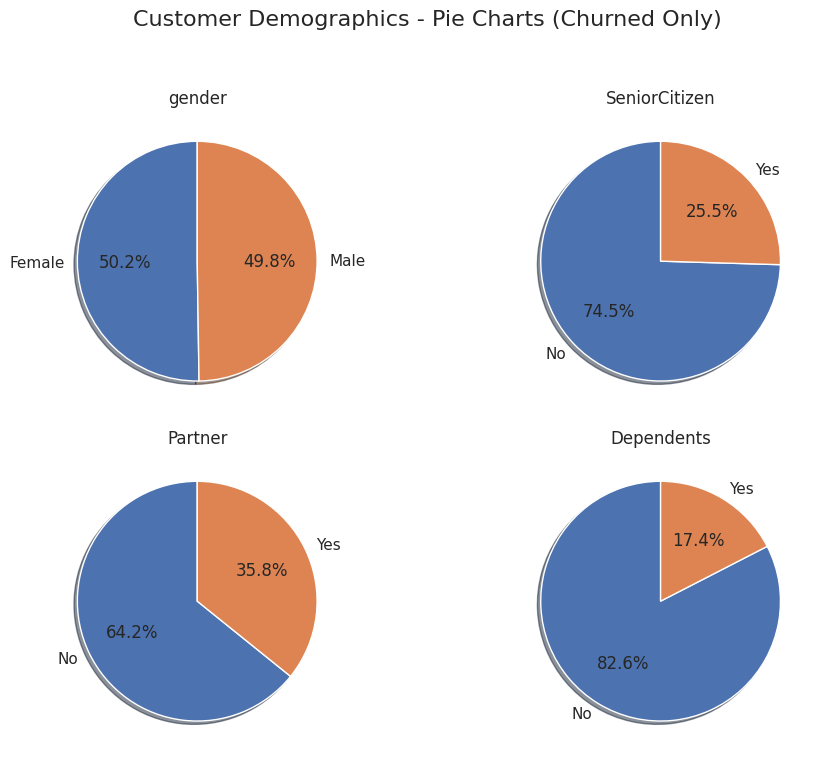

In [55]:
plot_pie_for_group("Customer Demographics", groups["Customer Demographics"], churned_df)

## 5. Label Encoding and Feature Selection

In [270]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


**Label encoding of target column**

In [271]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})
df.head(3)

<ipython-input-271-3154f5339aba>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [272]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


**Label encoding of categorical features**

In [273]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [274]:
print(object_columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [275]:
# Initialize a dictionary to save the encoders
encoders = {}

# Apply label encoding and print the label-value mapping
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

    # Print label mappings (what label became what number)
    print(f"\n🔤 Encoding for column: {column}")
    mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    for label, value in mapping.items():
        print(f"  {label} → {value}")

# Save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)



🔤 Encoding for column: gender
  Female → 0
  Male → 1

🔤 Encoding for column: SeniorCitizen
  No → 0
  Yes → 1

🔤 Encoding for column: Partner
  No → 0
  Yes → 1

🔤 Encoding for column: Dependents
  No → 0
  Yes → 1

🔤 Encoding for column: PhoneService
  No → 0
  Yes → 1

🔤 Encoding for column: MultipleLines
  No → 0
  Yes → 1

🔤 Encoding for column: InternetService
  DSL → 0
  Fiber optic → 1
  No → 2

🔤 Encoding for column: OnlineSecurity
  No → 0
  Yes → 1

🔤 Encoding for column: OnlineBackup
  No → 0
  Yes → 1

🔤 Encoding for column: DeviceProtection
  No → 0
  Yes → 1

🔤 Encoding for column: TechSupport
  No → 0
  Yes → 1

🔤 Encoding for column: StreamingTV
  No → 0
  Yes → 1

🔤 Encoding for column: StreamingMovies
  No → 0
  Yes → 1

🔤 Encoding for column: Contract
  Month-to-month → 0
  One year → 1
  Two year → 2

🔤 Encoding for column: PaperlessBilling
  No → 0
  Yes → 1

🔤 Encoding for column: PaymentMethod
  Bank transfer (automatic) → 0
  Credit card (automatic) → 1
  Elec

In [276]:
encoders

{'gender': LabelEncoder(),
 'SeniorCitizen': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [277]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


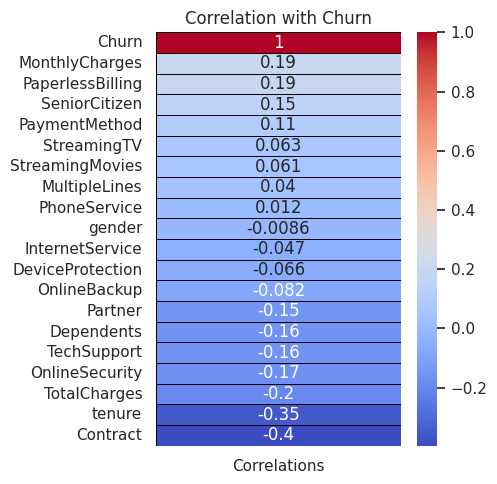

In [278]:
# Calculate correlation of each numeric feature with Churn
corr = df.corrwith(df['Churn']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

# Plot heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black')
plt.title('Correlation with Churn')
plt.tight_layout()
plt.show()

In [279]:
# Filter weakly correlated features
low_corr_features = corr[abs(corr['Correlations']) < 0.05]

# Print them
print("🔻 Features weakly correlated with Churn (|correlation| < 0.05):\n")
print(low_corr_features)


🔻 Features weakly correlated with Churn (|correlation| < 0.05):

                 Correlations
MultipleLines        0.040102
PhoneService         0.011942
gender              -0.008612
InternetService     -0.047291


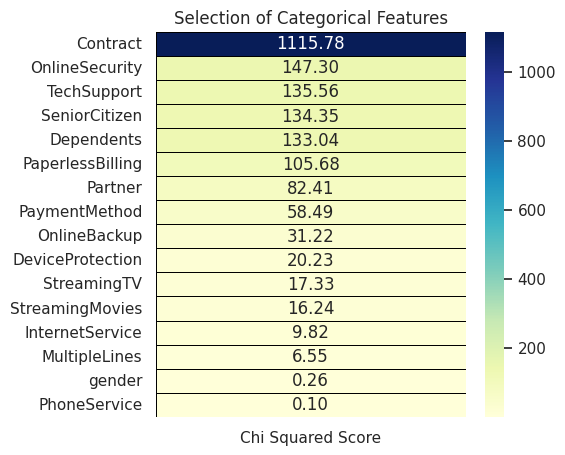

In [280]:
# Chi-squared test for categorical features
features = df[object_columns]
target = df['Churn']

best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=features.columns, columns=['Chi Squared Score'])

# Plot heatmap
colors = "YlGnBu"
plt.figure(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(by='Chi Squared Score', ascending=False),
            annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Categorical Features')
plt.show()

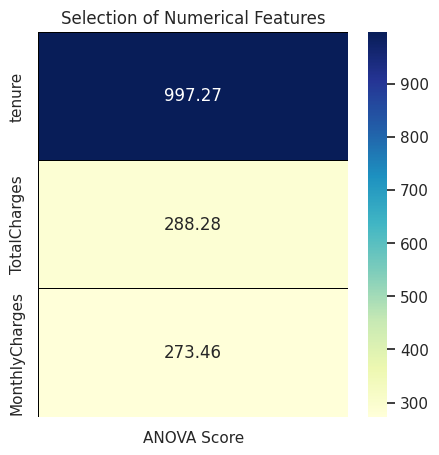

In [281]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
features = df[numerical_features]
target = df['Churn']

# ANOVA F-test for numerical features
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

# Create DataFrame of scores
featureScores = pd.DataFrame(data=fit.scores_,
                             index=features.columns,
                             columns=['ANOVA Score']).round(2)

# Plot heatmap
colors = "YlGnBu"
plt.figure(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(by='ANOVA Score', ascending=False),
            annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')
plt.show()

In [282]:
df.drop(columns = ['PhoneService', 'gender'],inplace = True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## 6. Splitting data into Training and Test data

In [283]:
# Seperate features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [284]:
# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [285]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5634, 17) (1409, 17) (5634,) (1409,)


In [286]:
print(y_train.value_counts(), y_test.value_counts())

Churn
0    4139
1    1495
Name: count, dtype: int64 Churn
0    1035
1     374
Name: count, dtype: int64


## 7. Model Building and Initial Evaluation

In [287]:
counter = Counter(y_train)
neg, pos = counter[0], counter[1]
scale_pos_weight = neg / pos


#list of models
models = [DecisionTreeClassifier(random_state=42, class_weight='balanced'), RandomForestClassifier(random_state=42, class_weight='balanced'), XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, eval_metric='logloss')]

7.1 Cross Validation - Training with default hyperparameters. Models selected are
1.   Desicion Tree Classifier
2.   Random Forest Classifier
3.   XGBoost Classifier



In [288]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def compare_models_cross_validation_skf():

  for model in models:
    cv_score = cross_val_score(model, X_train, y_train, cv=skf)
    mean_accuracy = np.mean(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)
    print("Cross Validation accuracies for the ", model, " = ", cv_score)
    print("Accuracy % of the ", model, " = ", mean_accuracy)
    print("-"*50)


In [289]:
compare_models_cross_validation_skf()

Cross Validation accuracies for the  DecisionTreeClassifier(class_weight='balanced', random_state=42)  =  [0.7444543  0.73469388 0.75510204 0.75776398 0.74511545]
Accuracy % of the  DecisionTreeClassifier(class_weight='balanced', random_state=42)  =  74.74
--------------------------------------------------
Cross Validation accuracies for the  RandomForestClassifier(class_weight='balanced', random_state=42)  =  [0.78615794 0.7755102  0.80212955 0.77994676 0.80373002]
Accuracy % of the  RandomForestClassifier(class_weight='balanced', random_state=42)  =  78.95
--------------------------------------------------
Cross Validation accuracies for the  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              import

Insights: Random Forest gives the highest accuracy compared to other models with default parameters

Accuracy Score:
 0.7267565649396736


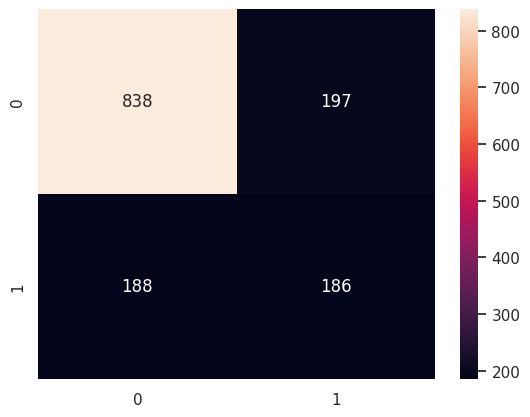

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1035
           1       0.49      0.50      0.49       374

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



In [290]:
dtc = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtc.fit(X_train, y_train)

# evaluate on test data
y_test_pred = dtc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7849538679914834


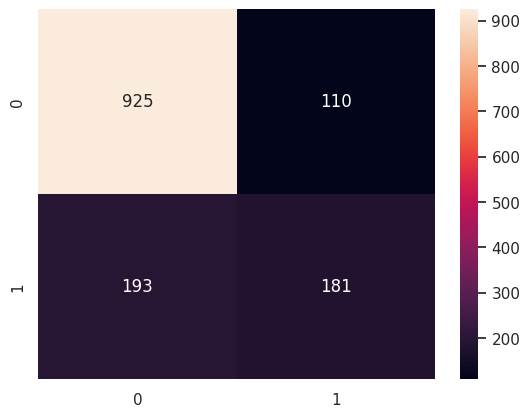

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



In [291]:
rfc = RandomForestClassifier(random_state=42, class_weight='balanced')
rfc.fit(X_train, y_train)

# evaluate on test data
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7579843860894251


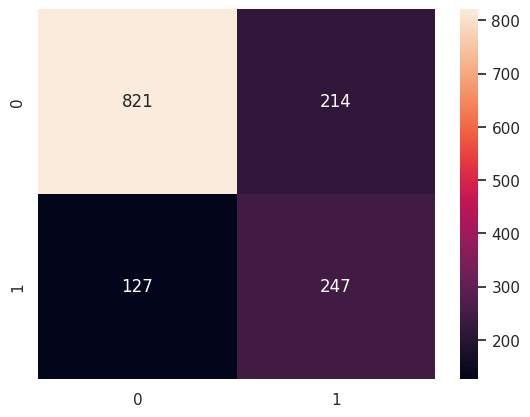

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.54      0.66      0.59       374

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.77      1409



In [292]:
xgbc = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, eval_metric='logloss')
xgbc.fit(X_train, y_train)

# evaluate on test data
y_test_pred = xgbc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_test_pred))

## 8. Hyperparameter Tuning and Selecting Best Model

In [293]:
#Hyperparameter grids for RandomizedSearchCV
param_grid_rfc = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_xgbc = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.7, 1.0]
}

In [296]:
#Hyperparameter tuning for the best models

#The below steps can be automated by using a for loo[ or by using a pipeline

#perform RandomizedSearchCV for each
rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid_rfc, n_iter=50, cv=5, scoring="accuracy", random_state=42)
xgbc_random = RandomizedSearchCV(estimator=xgbc, param_distributions=param_grid_xgbc, n_iter=50, cv=5, scoring="accuracy", random_state=42)


In [297]:
#fit the rfc_random model
rfc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='accuracy')

In [298]:
#fit the xgbc_random model
xgbc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=50,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [299]:
print("Best parameters for Random Forest Classifier:", rfc_random.best_params_)
print("Best score for Random Forest Classifier:", rfc_random.best_score_)
print("Best parameters for XGBoost Classifier:", xgbc_random.best_params_)
print("Best score for XGBoost Classifier:", xgbc_random.best_score_)

Best parameters for Random Forest Classifier: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
Best score for Random Forest Classifier: 0.7887784258811255
Best parameters for XGBoost Classifier: {'subsample': 0.5, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.01}
Best score for XGBoost Classifier: 0.7768862460421655


In [300]:
#Get the model with best score
best_model = None
best_score = 0

if rfc_random.best_score_ > best_score:
  best_score = rfc_random.best_score_
  best_model = rfc_random.best_estimator_

if xgbc_random.best_score_ > best_score:
  best_score = xgbc_random.best_score_
  best_model = xgbc_random.best_estimator_

In [301]:
print("Best model:", best_model)
print("Best score:", best_score)

Best model: RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       random_state=42)
Best score: 0.7887784258811255


In [302]:
# save the best model as a pickle file
model_data = {
    "model": best_model,
    "feature_names": X_train.columns.tolist(),
    "encoders": {col: encoders[col] for col in X_train.columns if col in encoders}
}

with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)


## 9. Evaluating the Best Model using Test Data

Accuracy Score:
 0.7849538679914834


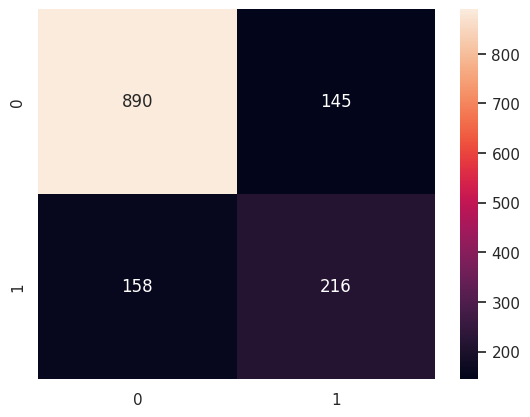

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      1035
           1       0.60      0.58      0.59       374

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [303]:
#evaluate on test data
y_test_pred = best_model.predict(X_test)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="d")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_test_pred))

10. Build a Predictive System

In [304]:
# load the saved model and the feature names

with open("customer_churn_model.pkl", "rb") as f:
    model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["feature_names"]
encoders = model_data["encoders"]

In [305]:
print(loaded_model)

RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       random_state=42)


In [306]:
print(feature_names)

['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [311]:
# 1. New customer input
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 'No',
    'Partner': 'No',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

# 2. Convert to DataFrame
input_df = pd.DataFrame([input_data])

# 3. Encode only categorical features used in training
for column in encoders:
    if column in input_df.columns and column in feature_names:
        input_df[column] = encoders[column].transform(input_df[column].astype(str))

# 4. Filter and reorder to match training feature order
input_df = input_df[feature_names]

# 5. Predict
prediction = loaded_model.predict(input_df)[0]
churn_prob = loaded_model.predict_proba(input_df)[0][1]  # probability of churn class (1)

# 6. Output
print(f"Prediction: {'Churn' if prediction == 1 else 'No Churn'}")
print(f"Churn Probability: {churn_prob:.2%}")

Prediction: Churn
Churn Probability: 64.24%


**To do:**
1. Implement Hyperparameter Tuining--->do for 100
2. Try Model Selection ---> based on what i want out of rfc and xgbc classf scores
3. Log reg --> no
4. Further feature eng suggest and Better feature selection
5. Remove grouped graphs
6. GridSearchCV and increase iter or other advanced tuning
7. Improve performance?
